<a href="https://colab.research.google.com/github/sakshichoudhary193/HRA-_PRACTICAL1_ADT24MGTM0622/blob/main/HRA__PRACTICAL4_ADT24MGTM0622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd # For data manipulation
 import numpy as np # For numerical computations
 import matplotlib.pyplot as plt # For plotting
 import seaborn as sns # For visualizations
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import LabelEncoder, StandardScaler
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/employee_training_data.csv')

In [3]:
df.head() # Display first few records

,EmployeeID,Department,Experience,TrainingHours,CourseCompletionRate,PreTrainingScore,PostTrainingScore,EngagementScore,PerformanceRating
0,101,IT,11,13,76.04,52,48,3.40,6
1,102,Operations,11,30,98.06,67,54,3.78,8
2,103,Finance,10,6,92.23,74,54,4.52,9
3,104,Operations,12,24,87.37,42,65,3.50,4
4,105,Operations,12,32,76.98,43,81,2.18,1


In [4]:
 df.info() # Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeID            25 non-null     int64  
 1   Department            25 non-null     object 
 2   Experience            25 non-null     int64  
 3   TrainingHours         25 non-null     int64  
 4   CourseCompletionRate  25 non-null     float64
 5   PreTrainingScore      25 non-null     int64  
 6   PostTrainingScore     25 non-null     int64  
 7   EngagementScore       25 non-null     float64
 8   PerformanceRating     25 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 1.9+ KB


In [5]:
 df.describe() # Statistical summary

,EmployeeID,Experience,TrainingHours,CourseCompletionRate,PreTrainingScore,PostTrainingScore,EngagementScore,PerformanceRating
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,113.000000,8.520000,20.160000,77.498800,48.080000,70.240000,2.737200,3.640000
std,7.359801,4.032369,10.366935,14.558224,15.984159,14.972976,1.014678,2.675195
min,101.000000,2.000000,6.000000,50.700000,20.000000,43.000000,1.000000,1.000000
25%,107.000000,5.000000,12.000000,64.810000,41.000000,54.000000,2.080000,1.000000
50%,113.000000,9.000000,18.000000,79.340000,52.000000,71.000000,2.430000,3.000000
75%,119.000000,12.000000,30.000000,89.510000,58.000000,81.000000,3.500000,6.000000
max,125.000000,14.000000,39.000000,98.260000,74.000000,99.000000,4.630000,9.000000


In [6]:
 df.isnull().sum() # Missing value check

,0
EmployeeID,0
Department,0
Experience,0
TrainingHours,0
CourseCompletionRate,0
PreTrainingScore,0
PostTrainingScore,0
EngagementScore,0
PerformanceRating,0


In [7]:
 df.fillna(df.mean(numeric_only=True), inplace=True)

In [9]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [10]:
 df['LearningGain'] = df['PostTrainingScore'] - df['PreTrainingScore']

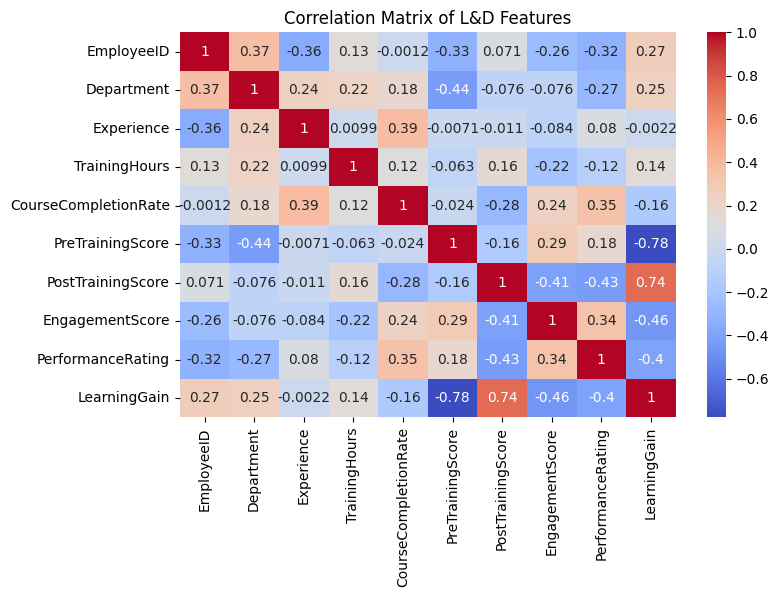

In [12]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of L&D Features")
plt.show()

In [13]:
 X = df[['TrainingHours', 'CourseCompletionRate', 'EngagementScore', 'Experience', 'PreTrainingScore']]
 y = df['LearningGain']
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.40764738050229554
MAE: 10.605999999999998


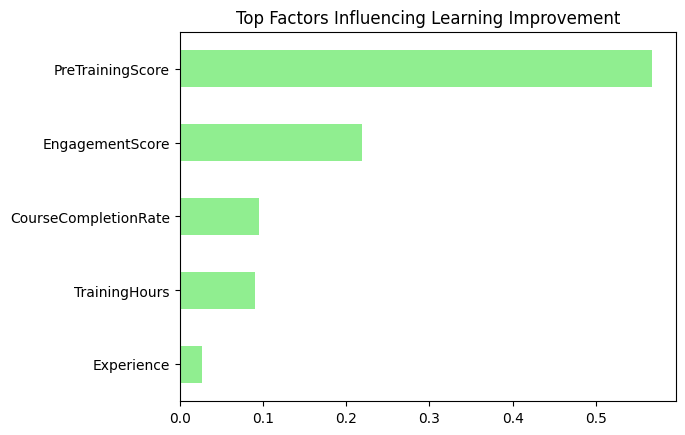


Top Predictors of L&D Effectiveness:
PreTrainingScore        0.567527
EngagementScore         0.219033
CourseCompletionRate    0.095461
TrainingHours           0.090803
Experience              0.027176
dtype: float64


In [21]:
 importance = pd.Series(model.feature_importances_, index=X.columns)
 importance.sort_values(ascending=True).plot(kind='barh', color='lightgreen')
 plt.title("Top Factors Influencing Learning Improvement")
 plt.show()
 print("\nTop Predictors of L&D Effectiveness:")
 print(importance.sort_values(ascending=False).head(5))